In [1]:
import glob
import os

import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd
import scienceplots
import seaborn as sns

plt.style.use(["science", "no-latex"])
my_style = {
    "text.usetex": False,
    "figure.constrained_layout.use": True,
    "figure.autolayout": False,
    "savefig.bbox": "tight",
    "savefig.pad_inches": 0.015,
    "font.size": 14,
    "axes.labelsize": 12,
    "legend.fontsize": 12,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "axes.titlesize": 14,
}
plt.rcParams.update(my_style)

In [2]:
def read_csv_files(file_pattern):
    all_data = []
    for file in glob.glob(file_pattern):
        full_dataset_name = os.path.basename(os.path.dirname(file))
        dataset_name = full_dataset_name.split("_")[0]
        df = pd.read_csv(file).round(2)
        df["Dataset"] = dataset_name  # Add a new column with constant value
        df["Method"] = df["Method"].apply(lambda s: s.split()[0])
        df["Split"] = "Train" if "_train" in file else "Test"
        # Query existing levels
        current_levels = list(df.index.names)
        df = df.set_index(["Dataset", "Split"])
        # Create MultiIndex columns
        df = df.pivot(columns="Method", values=["NMSE", "PSNR", "SSI"])     

        # Sort column labels
        df = df.sort_index(axis=1)   
        all_data.append(df)

    return pd.concat(all_data).sort_index()

In [3]:
# Main execution
experiment = "experiments_64x64_2"
formatted_df = read_csv_files(f"{experiment}/*/image_metrics_*.csv")
formatted_df

NMSE         PSNR          SSI      
Method                 PCA POLCA    PCA  POLCA   PCA POLCA
Dataset        Split                                      
bent           Test   0.33  0.04  14.71  34.71  0.61  0.99
               Train  0.31  0.00  15.29  51.55  0.67  1.00
bloodmnist     Test   0.14  0.13  19.95  20.34  0.51  0.54
               Train  0.14  0.12  19.97  20.98  0.52  0.56
breastmnist    Test   0.26  0.31  20.46  21.09  0.36  0.42
               Train  0.26  0.01  20.60  54.39  0.38  1.00
chestmnist     Test   0.18  0.14  20.81  22.68  0.67  0.75
               Train  0.18  0.14  20.76  22.70  0.67  0.75
dermamnist     Test   0.10  0.09  24.84  25.14  0.69  0.70
               Train  0.10  0.08  24.86  26.22  0.69  0.71
fmnist         Test   0.40  0.28  16.19  19.60  0.47  0.67
               Train  0.40  0.28  16.18  19.69  0.47  0.67
mnist          Test   0.55  0.31  15.13  20.26  0.50  0.80
               Train  0.55  0.30  15.08  20.40  0.50  0.80
octmnist       Test   0.36  0.23  20.20  24.32  0.49  0.67
               Train  0.38  0.23  20.72  25.05  0.54  0.75
organamnist    Test   0.34  0.34  15.92  15.84  0.22  0.24
               Train  0.34  0.27  15.63  17.60  0.23  0.36
organcmnist    Test   0.32  0.32  16.40  16.38  0.25  0.28
               Train  0.32  0.26  15.91  17.60  0.24  0.34
organsmnist    Test   0.31  0.32  16.67  16.39  0.25  0.26
               Train  0.31  0.27  16.24  17.53  0.24  0.32
pathmnist      Test   0.16  0.16  20.17  19.87  0.30  0.30
               Train  0.15  0.15  20.85  20.76  0.27  0.27
pneumoniamnist Test   0.13  0.13  22.58  22.68  0.61  0.66
               Train  0.13  0.11  22.74  24.50  0.61  0.69
retinamnist    Test   0.15  0.16  26.97  26.79  0.82  0.83
               Train  0.14  0.08  27.10  31.68  0.83  0.91
sinusoidal     Test   0.19  0.01  20.56  44.69  0.84  1.00
               Train  0.19  0.00  20.59  52.87  0.84  1.00

In [4]:
# Generate LaTeX table
latex_table = formatted_df.to_latex(
    multirow=True,
    multicolumn=True,
    caption="Image Metrics Comparison",
    label="tab:image_metrics_comparison",
    position="htbp",
    float_format="%.4f",
    column_format="lrrrrrr",
)
print(latex_table)
# with open("experiments/image_metrics_comparison.tex", "w") as f:
#     f.write(latex_table)

\begin{table}[htbp]
\caption{Image Metrics Comparison}
\label{tab:image_metrics_comparison}
\begin{tabular}{lrrrrrr}
\toprule
 &  & \multicolumn{2}{r}{NMSE} & \multicolumn{2}{r}{PSNR} & \multicolumn{2}{r}{SSI} \\
 & Method & PCA & POLCA & PCA & POLCA & PCA & POLCA \\
Dataset & Split &  &  &  &  &  &  \\
\midrule
\multirow[t]{2}{*}{bent} & Test & 0.3300 & 0.0400 & 14.7100 & 34.7100 & 0.6100 & 0.9900 \\
 & Train & 0.3100 & 0.0000 & 15.2900 & 51.5500 & 0.6700 & 1.0000 \\
\cline{1-8}
\multirow[t]{2}{*}{bloodmnist} & Test & 0.1400 & 0.1300 & 19.9500 & 20.3400 & 0.5100 & 0.5400 \\
 & Train & 0.1400 & 0.1200 & 19.9700 & 20.9800 & 0.5200 & 0.5600 \\
\cline{1-8}
\multirow[t]{2}{*}{breastmnist} & Test & 0.2600 & 0.3100 & 20.4600 & 21.0900 & 0.3600 & 0.4200 \\
 & Train & 0.2600 & 0.0100 & 20.6000 & 54.3900 & 0.3800 & 1.0000 \\
\cline{1-8}
\multirow[t]{2}{*}{chestmnist} & Test & 0.1800 & 0.1400 & 20.8100 & 22.6800 & 0.6700 & 0.7500 \\
 & Train & 0.1800 & 0.1400 & 20.7600 & 22.7000 & 0.6700 & 0.750

In [5]:
# Reshape the DataFrame
df_long = (
    formatted_df.stack(level=[0, 1], future_stack=True)
    .reset_index()
    .rename(columns={"level_2": "Metric", "level_3": "Method", 0: "Value"})
)
df_long

,Dataset,Split,Metric,Method,Value
0,bent,Test,NMSE,PCA,0.33
1,bent,Test,NMSE,POLCA,0.04
2,bent,Test,PSNR,PCA,14.71
3,bent,Test,PSNR,POLCA,34.71
4,bent,Test,SSI,PCA,0.61
...,...,...,...,...,...
175,sinusoidal,Train,NMSE,POLCA,0.00
176,sinusoidal,Train,PSNR,PCA,20.59
177,sinusoidal,Train,PSNR,POLCA,52.87
178,sinusoidal,Train,SSI,PCA,0.84


In [6]:
df = pd.DataFrame(df_long.copy())

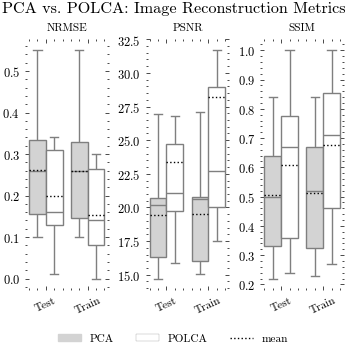

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(3.5, 3.5))
for ax, metric, title in zip(axs, ["NMSE", "PSNR", "SSI"], ["NRMSE", "PSNR", "SSIM"]):
    ax = sns.boxplot(
        data=df[df["Metric"] == metric],
        x="Split",
        y="Value",
        hue="Method",
        fill=True,
        palette={"PCA": "lightgray", "POLCA": "white"},
        gap=0.0,
        showmeans=True,
        meanprops={"ls": ":", "c": "k"},
        meanline=True,
        showfliers=False,
        fliersize=0.5,
        ax=ax,
        legend=False,
    )
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(title, fontsize="xx-small")
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Test", "Train"], rotation=25, ha="center", fontsize="xx-small")
    # ax.grid()


plt.suptitle("PCA vs. POLCA: Image Reconstruction Metrics", fontsize="small")
PCA_patch = mpatches.Patch(
    color="lightgray",
    label="PCA",
)
POLCA_patch = mpatches.Patch(facecolor="white", label="POLCA", edgecolor="k", lw=0.1)
means_leg = mlines.Line2D([], [], ls=":", color="k", marker=None, markersize=15, label="mean")
fig.legend(
    handles=[PCA_patch, POLCA_patch, means_leg],
    loc="outside lower center",
    fontsize="xx-small",
    ncols=3,
    borderaxespad=0.0,
)
# Tweak the visual presentation
sns.despine(trim=True, left=True, right=True, top=True, bottom=True)
plt.savefig(f"{experiment}/image_metrics_comparison_boxplot.pdf", dpi=300, bbox_inches="tight")